In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC1027_vG2023+GaiaDR3.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465695474182156288,40.406755,61.776293,0.7598,-2.144,2.240,20.454760,21.504877,19.255125,...,NaN,NaN,NaN,NaN,40.406775,61.776283,10.129286,10.781652,-0.1126,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0
1377,NGC_1027,465695126289128576,40.340698,61.742587,0.6292,-1.685,2.128,19.259914,20.094313,18.372610,...,NaN,NaN,NaN,NaN,40.340714,61.742578,4.578806,5.166427,-0.2178,0.0
1378,NGC_1027,465695096222913152,40.387508,61.768844,0.3626,-1.220,2.507,20.064852,21.051865,18.944124,...,NaN,NaN,NaN,NaN,40.387520,61.768833,8.462630,8.415401,0.0792,0.0


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,NGC_1027,465699421256538368,40.269906,61.848165,0.9031,-1.868,1.933,17.708502,18.587675,16.822248,...,0.4368,0.3484,0.4884,PHOENIX,40.269923,61.848156,1.550565,1.533550,-0.1668,0.0
1373,NGC_1027,465699215097697664,40.361267,61.884989,0.8797,-1.744,2.062,16.665634,17.330374,15.860227,...,0.5042,0.4890,0.5181,MARCS,40.361283,61.884980,0.833605,0.912919,-0.1607,0.0
1374,NGC_1027,465695474190193408,40.427435,61.781116,0.7913,-1.737,2.134,16.822556,17.511656,16.019714,...,0.6440,0.6199,0.6546,PHOENIX,40.427452,61.781107,0.928986,0.960028,-0.1326,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0


# 5 Populations

In [5]:
p1 = pd.read_csv('Catalogues/pop1_NGC1027_Kmeans2.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC1027_Kmeans2.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC1027_Kmeans2.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC1027_Kmeans2.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC1027_Kmeans2.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
25,41.391990,60.440964,-1.793,1.868,15.092919,1.412945,0.8665,0
27,41.760699,60.667437,-1.459,2.020,15.022243,1.328855,0.9060,0
31,41.971382,60.869417,-1.530,2.133,13.546622,0.857985,0.8965,0
35,41.851700,60.892318,-1.809,1.878,12.826741,0.889601,0.9197,0
38,41.611992,60.973924,-1.594,1.968,15.476273,1.462549,0.9201,0
...,...,...,...,...,...,...,...,...
657,40.535502,62.250256,-1.561,1.511,15.499130,1.377172,0.8556,0
658,40.352148,62.384449,-1.906,1.672,11.635002,0.625908,0.9600,0
663,40.418894,62.564516,-1.798,2.388,13.865103,0.935928,0.9564,0
748,38.075178,62.268490,-1.970,2.068,14.957641,1.144249,0.8460,0


In [12]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
859,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,...,1.0850,1.0804,1.0892,MARCS,41.391990,60.440964,0.358247,0.381025,-0.1236,0.0
687,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,...,0.9842,0.9744,0.9895,MARCS,41.760699,60.667437,0.355979,0.334857,-0.1361,0.0
669,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,...,0.8384,0.8376,0.8392,A,41.971382,60.869417,0.208742,0.191189,-0.1311,0.0
673,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,...,NaN,NaN,NaN,NaN,41.851700,60.892318,0.215535,0.196625,-0.0597,0.0
643,NGC_1027,464850499494348160,41.611977,60.973933,0.9201,-1.594,1.968,15.476273,16.141022,14.678472,...,0.7778,0.7738,0.7821,MARCS,41.611992,60.973924,0.467484,0.443929,0.0319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NGC_1027,465992307968003456,40.535487,62.250263,0.8556,-1.561,1.511,15.499130,16.115688,14.738516,...,0.6260,0.6230,0.6293,PHOENIX,40.535502,62.250256,0.564794,0.606694,-0.1319,0.0
985,NGC_1027,465997118335548672,40.352130,62.384456,0.9600,-1.906,1.672,11.635002,11.865830,11.239923,...,0.7453,0.7433,0.7470,A,40.352148,62.384449,0.301676,0.335588,-0.0359,0.0
97,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,...,0.7283,0.7138,0.7313,PHOENIX,40.418894,62.564516,0.242437,0.240394,-0.1078,0.0
540,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,...,0.6394,0.6258,0.6546,A,38.075178,62.268490,0.337357,0.360956,-0.0547,0.0


Text(0, 0.5, 'DEC (deg)')

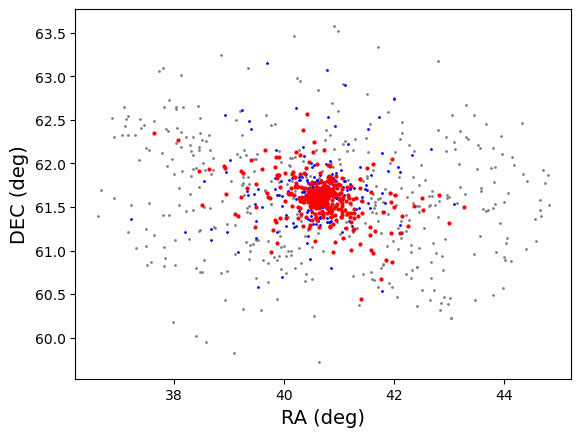

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_c = p1_t /dfvg_t
p1_c*100

58.62646566164153

Pureness

In [16]:
p1_p = p1_t/len(p1)
p1_p*100

44.871794871794876

### Population 2

In [17]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,41.623962,59.703388,-0.567,2.437,19.757400,2.339542,0.8678,1
1,41.526137,59.663297,-3.042,1.622,19.291763,2.251530,0.8485,1
2,41.201648,59.656886,-2.224,3.729,16.880320,1.849627,1.0068,1
3,41.232358,59.705180,-3.707,3.279,19.948261,2.251060,1.0499,1
4,41.462695,59.710435,-1.366,3.106,20.509865,2.007286,0.9441,1
...,...,...,...,...,...,...,...,...
756,37.420404,61.860960,-2.330,3.820,17.917997,2.114664,0.9192,1
757,37.445598,61.865508,-1.862,3.414,18.967450,2.419193,0.9116,1
758,37.438561,62.134472,-2.715,2.192,19.601444,2.982639,0.8876,1
759,36.532016,61.872687,-3.481,3.202,18.314350,2.133593,1.0416,1


In [23]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
182,41.773842,60.540364,-1.799,2.160,17.921892,1.896875,0.8545,1
282,42.129525,61.202528,-1.683,2.050,17.742489,1.740564,0.8452,1
283,42.106408,61.296691,-1.412,2.007,17.682974,1.716513,0.9305,1
290,43.087664,61.532170,-1.653,2.000,16.749838,1.668623,0.9334,1
363,39.961185,60.691539,-1.785,1.676,17.667414,1.862482,0.8992,1
...,...,...,...,...,...,...,...,...
685,40.883413,61.755128,-1.879,1.880,18.312330,1.975773,0.9373,1
686,40.771948,61.740697,-1.820,1.798,18.507225,2.000399,0.8780,1
688,40.718639,61.750417,-1.754,1.855,18.584120,2.565418,0.9790,1
706,39.840373,61.706374,-2.007,2.139,17.575466,1.751877,0.9450,1


In [24]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
779,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,...,0.4450,0.4032,0.5247,PHOENIX,41.773842,60.540364,1.608477,1.663375,-0.1617,0.0
395,NGC_1027,464952681062317696,42.129509,61.202537,0.8452,-1.683,2.050,17.742489,18.591160,16.850595,...,0.2859,0.2431,0.3285,PHOENIX,42.129525,61.202528,1.581109,1.648712,-0.2475,0.0
403,NGC_1027,464954334632868864,42.106395,61.296700,0.9305,-1.412,2.007,17.682974,18.510344,16.793830,...,0.3610,0.3454,0.3776,PHOENIX,42.106408,61.296691,1.454143,1.531836,-0.1831,0.0
112,NGC_1027,464972888890793728,43.087649,61.532179,0.9334,-1.653,2.000,16.749838,17.531164,15.862541,...,0.4162,0.3997,0.4268,PHOENIX,43.087664,61.532170,0.995501,0.878127,-0.1494,0.0
517,NGC_1027,465206122792910592,39.961169,60.691546,0.8992,-1.785,1.676,17.667414,18.593813,16.731330,...,0.7456,0.7268,0.7678,PHOENIX,39.961185,60.691539,1.567187,1.446763,0.0234,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,NGC_1027,465774359844544512,40.883395,61.755136,0.9373,-1.879,1.880,18.312330,19.334888,17.359116,...,0.4729,0.3834,0.5124,PHOENIX,40.883413,61.755128,2.204601,2.000612,-0.1146,0.0
700,NGC_1027,465775940392494208,40.771931,61.740705,0.8780,-1.820,1.798,18.507225,19.482449,17.482050,...,0.2374,0.2151,0.2575,PHOENIX,40.771948,61.740697,2.619782,2.293548,-0.1023,0.0
714,NGC_1027,465776387069101568,40.718623,61.750425,0.9790,-1.754,1.855,18.584120,20.012080,17.446661,...,0.6160,0.5990,0.6319,PHOENIX,40.718639,61.750417,2.501024,2.508899,-0.0424,0.0
1149,NGC_1027,465878779090666368,39.840354,61.706384,0.9450,-2.007,2.139,17.575466,18.428988,16.677110,...,0.3006,0.2433,0.5320,PHOENIX,39.840373,61.706374,1.498732,1.410078,-0.0380,0.0


Text(0, 0.5, 'DEC (deg)')

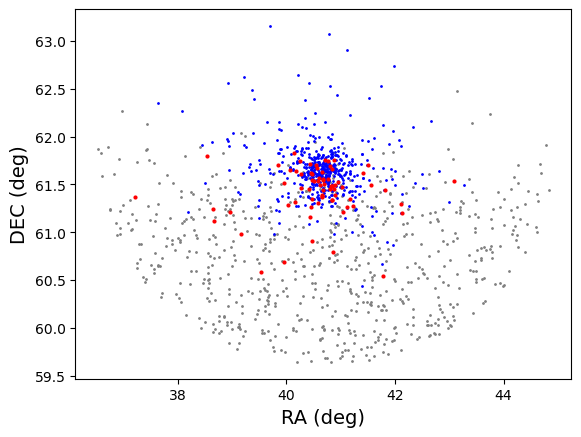

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_c = p2_t /dfvg_t
p2_c*100

12.060301507537687

Pureness

In [28]:
p2_p = p2_t/len(p2)
p2_p*100

9.461235216819974

### Population 3

In [29]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
338,40.732540,61.599478,-2.307,1.660,18.468960,2.205153,0.8784,2
453,39.516314,61.707838,-2.041,1.726,18.107975,1.945528,0.8861,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
218,NGC_1027,465678083858467968,40.732518,61.599486,0.8784,-2.307,1.660,18.468960,19.618435,17.413282,...,0.4139,0.3983,0.4387,PHOENIX,40.732540,61.599478,2.368949,2.278584,-0.1193,0.0
1104,NGC_1027,465881016775502976,39.516295,61.707846,0.8861,-2.041,1.726,18.107975,19.104458,17.158930,...,0.4301,0.3451,0.5284,PHOENIX,39.516314,61.707838,1.852270,2.067463,0.0151,0.0


Text(0, 0.5, 'DEC (deg)')

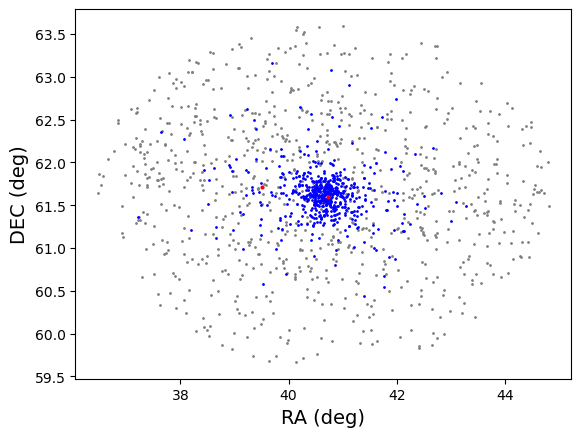

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_c = p3_t /dfvg_t
p3_c*100

0.33500837520938026

Pureness

In [39]:
p3_p = p3_t/len(p3)
p3_p*100

0.23446658851113714

### Population 4

In [40]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
116,40.422413,61.087284,-1.824,1.933,17.097599,1.682651,1.0374,3
130,40.607975,61.336185,-1.467,1.869,15.721642,1.443523,0.9886,3
135,40.778560,61.367838,-1.828,1.918,16.825521,1.567552,0.9788,3
136,40.831929,61.387547,-1.543,1.789,16.774263,1.534787,0.9779,3
150,40.566990,61.368914,-1.915,2.059,17.594540,1.818642,1.0062,3
151,40.409094,61.370086,-1.931,1.945,15.468059,1.375162,0.9994,3
152,40.440674,61.468831,-1.978,1.860,17.791061,1.814960,0.9823,3
153,40.695541,61.499236,-1.469,1.801,17.362745,1.709114,0.9443,3
155,40.496804,61.471120,-1.795,2.149,18.243969,1.935892,1.0050,3
157,40.589063,61.543107,-1.937,1.683,18.808035,2.175901,0.9863,3


In [46]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1367,NGC_1027,465593494484211712,40.422396,61.087292,1.0374,-1.824,1.933,17.097599,17.905810,16.223158,...,0.5884,0.5729,0.6067,PHOENIX,40.422413,61.087284,1.107096,1.028673,-0.0489,0.0
1097,NGC_1027,465621016635641856,40.607961,61.336193,0.9886,-1.467,1.869,15.721642,16.366010,14.922488,...,0.8980,0.8925,0.9041,PHOENIX,40.607975,61.336185,0.604599,0.684301,-0.0977,0.0
1268,NGC_1027,465626101876878976,40.778543,61.367847,0.9788,-1.828,1.918,16.825521,17.559204,15.991653,...,0.5304,0.5170,0.5445,MARCS,40.778560,61.367838,0.808412,0.898395,-0.0923,0.0
1274,NGC_1027,465626514193723776,40.831915,61.387555,0.9779,-1.543,1.789,16.774263,17.491129,15.956342,...,0.6897,0.6673,0.7002,PHOENIX,40.831929,61.387547,0.793681,0.898322,-0.0690,0.0
983,NGC_1027,465668016457919872,40.566973,61.368923,1.0062,-1.915,2.059,17.594540,18.462423,16.643782,...,0.7697,0.7443,0.8029,MARCS,40.566990,61.368914,1.444462,1.429150,-0.2276,0.0
1057,NGC_1027,465668776673798912,40.409076,61.370094,0.9994,-1.931,1.945,15.468059,16.067920,14.692759,...,0.7001,0.6972,0.7030,PHOENIX,40.409094,61.370086,0.412854,0.455687,-0.0446,0.0
1089,NGC_1027,465672517580321792,40.440656,61.468839,0.9823,-1.978,1.860,17.791061,18.687458,16.872498,...,0.0852,0.0799,0.0921,PHOENIX,40.440674,61.468831,1.598830,1.607983,-0.0518,0.0
1006,NGC_1027,465675025845187072,40.695527,61.499244,0.9443,-1.469,1.801,17.362745,18.183931,16.474817,...,0.5870,0.5669,0.6176,PHOENIX,40.695541,61.499236,1.234025,1.230912,-0.1433,0.0
1004,NGC_1027,465675403798349184,40.496787,61.471130,1.0050,-1.795,2.149,18.243969,19.219248,17.283356,...,0.1285,0.1128,0.1494,PHOENIX,40.496804,61.471120,1.951687,2.159553,-0.1109,0.0
990,NGC_1027,465676090993259904,40.589045,61.543114,0.9863,-1.937,1.683,18.808035,19.929600,17.753698,...,0.3553,0.3156,0.3961,PHOENIX,40.589063,61.543107,2.955155,2.931385,-0.0791,0.0


Text(0, 0.5, 'DEC (deg)')

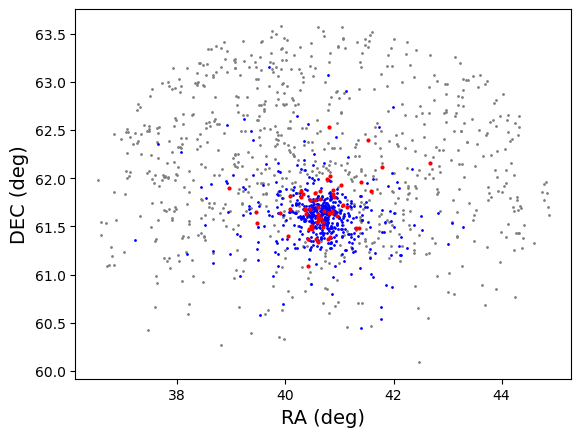

In [48]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [49]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [50]:
p4_c = p4_t /dfvg_t
p4_c*100

9.882747068676718

Pureness

In [51]:
p4_p = p4_t/len(p4)
p4_p*100

6.820809248554912

### Population 5

In [52]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [53]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [54]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [55]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [56]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [57]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
9,40.773236,61.576948,-2.224,2.156,16.820732,1.631710,0.8169,4
10,40.807497,61.621344,-1.580,2.171,17.379776,1.870768,0.8559,4
12,40.392637,61.615666,-2.123,2.088,17.390846,1.680300,0.8873,4
13,40.477620,61.635565,-1.962,2.061,17.659752,1.725805,0.8665,4
15,40.536740,61.663684,-1.836,2.155,17.773685,1.726931,0.8535,4
16,40.577569,61.737129,-1.899,2.094,8.076518,1.984071,0.8596,4
17,40.224418,61.594707,-2.080,2.086,17.522570,1.805796,0.8456,4
19,40.330173,61.677376,-1.647,1.828,18.528164,2.040499,0.8278,4
20,40.522206,61.728657,-1.706,2.287,17.420637,1.610514,0.9286,4
21,40.523639,61.774175,-1.622,2.198,17.604593,1.727125,0.9010,4


In [58]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
233,NGC_1027,465677813285042304,40.773215,61.576958,0.8169,-2.224,2.156,16.820732,17.588974,15.957264,...,0.4995,0.4883,0.5145,MARCS,40.773236,61.576948,0.889419,0.917379,-0.0753,0.0
225,NGC_1027,465677985083726080,40.807482,61.621354,0.8559,-1.580,2.171,17.379776,18.300390,16.429623,...,0.6083,0.5915,0.6213,PHOENIX,40.807497,61.621344,1.338616,1.212256,-0.1491,0.0
183,NGC_1027,465680351604917888,40.392617,61.615676,0.8873,-2.123,2.088,17.390846,18.185677,16.505377,...,0.4356,0.4179,0.4530,MARCS,40.392637,61.615666,1.505985,1.505418,-0.2600,0.0
209,NGC_1027,465680458984636416,40.477602,61.635574,0.8665,-1.962,2.061,17.659752,18.501362,16.775557,...,0.4156,0.3996,0.4339,PHOENIX,40.477620,61.635565,1.737578,1.707474,-0.2181,0.0
327,NGC_1027,465681867733876736,40.536722,61.663694,0.8535,-1.836,2.155,17.773685,18.529749,16.802818,...,0.6280,0.5905,0.6607,MARCS,40.536740,61.663684,1.892860,1.854615,-0.0662,0.0
360,NGC_1027,465682692367536384,40.577551,61.737139,0.8596,-1.899,2.094,8.076518,9.079157,7.095086,...,0.6813,0.6681,0.6924,MARCS,40.577569,61.737129,0.314047,0.315031,-0.0744,0.0
290,NGC_1027,465685990902583808,40.224398,61.594716,0.8456,-2.080,2.086,17.522570,18.389772,16.583977,...,0.8063,0.7841,0.8361,MARCS,40.224418,61.594707,1.439476,1.395900,-0.0679,0.0
159,NGC_1027,465693236510878720,40.330158,61.677384,0.8278,-1.647,1.828,18.528164,19.566525,17.526026,...,0.3386,0.3174,0.3685,PHOENIX,40.330173,61.677376,2.529004,2.648799,-0.2046,0.0
6,NGC_1027,465694305959115264,40.522190,61.728667,0.9286,-1.706,2.287,17.420637,18.183825,16.573310,...,0.3745,0.3527,0.3929,PHOENIX,40.522206,61.728657,1.416027,1.387286,-0.1834,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0


Text(0, 0.5, 'DEC (deg)')

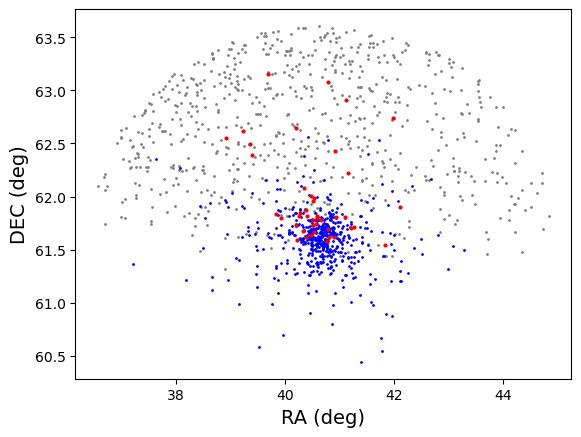

In [59]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [60]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [61]:
p5_c = p5_t /dfvg_t
p5_c*100

7.202680067001675

Pureness

In [62]:
p5_p = p5_t/len(p5)
p5_p*100

5.842391304347826

## Analyzing

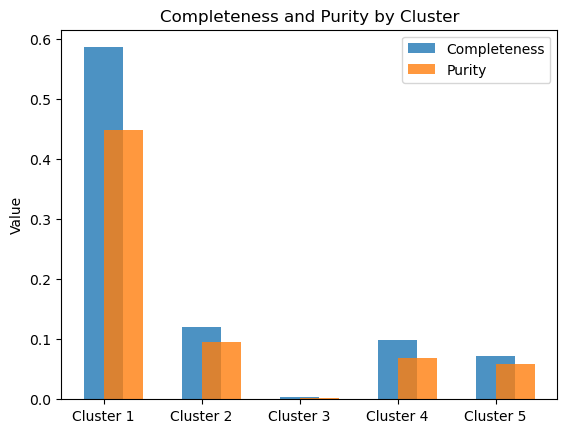

In [63]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()